# A2C Word test

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import logging
import os
import sys
import warnings

import torch
import torch.optim as optim

ROOT_FOLDER = os.path.join(".", "..")
if ROOT_FOLDER not in sys.path:
    sys.path.insert(0, ROOT_FOLDER)


from a2c import A2CNet, evaluate, train_eval_loop
from dataset import RegexDataset
from environment_metrics import Environment, EnvSettings
from plot import plot_rewards
from rl import PolicyAgent as Agent
from rl import PolicyTrajectoryBuffer as TrajectoryBuffer
from utils import set_seed

warnings.filterwarnings("ignore")
logging.disable(logging.WARNING)
torch.backends.cudnn.deterministic = True
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
DEVICE

device(type='cpu')

## Training

In [4]:
set_seed()
dataset = RegexDataset(*RegexDataset.from_disk("../../data/word.json"))
env = Environment(
    dataset,
    settings=EnvSettings(max_steps=5),
)

agent = Agent(temperature_coefficient=0)
buffer = TrajectoryBuffer(batch_size=64, device=DEVICE)

a2c_net = A2CNet(input_dim=env.state_space, output_dim=env.action_space).to(DEVICE)
a2c_optimizer = optim.Adam(a2c_net.parameters(), lr=1e-4)

In [ ]:
episode_rewards = train_eval_loop(
    a2c_net,
    a2c_optimizer,
    agent,
    buffer,
    env,
    epochs=100,
    episodes=1000,
    device=DEVICE,
    eval_period=20,
    entropy_beta=0.01,
    clip_grad=10,
)

Epoch   1/100:	Reward: -195.8	Loss: 562.218
Epoch   2/100:	Reward: -195.7	Loss: 561.532
Epoch   3/100:	Reward: -196.4	Loss: 564.315
Epoch   4/100:	Reward: -196.7	Loss: 565.132
Epoch   5/100:	Reward: -196.0	Loss: 562.819
Epoch   6/100:	Reward: -195.6	Loss: 561.350
Epoch   7/100:	Reward: -195.8	Loss: 562.213
Epoch   8/100:	Reward: -197.0	Loss: 566.404
Epoch   9/100:	Reward: -196.3	Loss: 563.968
Epoch  10/100:	Reward: -196.3	Loss: 563.830
Epoch  11/100:	Reward: -196.2	Loss: 563.496
Epoch  12/100:	Reward: -196.8	Loss: 565.712
Epoch  13/100:	Reward: -196.5	Loss: 564.622
Epoch  14/100:	Reward: -195.9	Loss: 562.529
Epoch  15/100:	Reward: -195.2	Loss: 559.837
Epoch  16/100:	Reward: -196.8	Loss: 565.844
Epoch  17/100:	Reward: -196.2	Loss: 563.492
Epoch  18/100:	Reward: -196.4	Loss: 564.346
Epoch  19/100:	Reward: -195.2	Loss: 559.722
Epoch  20/100:	Reward: -195.9	Loss: 562.310
Epoch  21/100:	Reward: -196.9	Loss: 565.918
Epoch  22/100:	Reward: -196.0	Loss: 562.874
Epoch  23/100:	Reward: -196.4	Lo

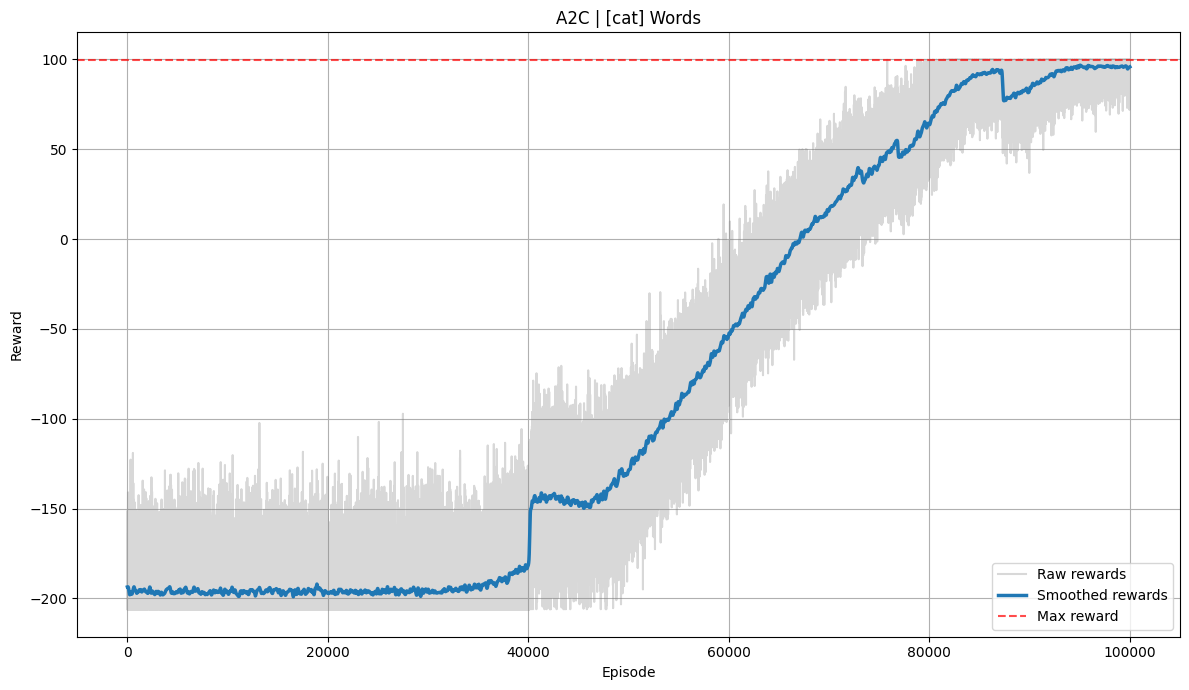

In [6]:
plot_rewards(episode_rewards, title="A2C | [cat] Words", window=50)

## Results

In [ ]:
set_seed()
trained_regex, trained_reward = evaluate(a2c_net, env, agent, device=DEVICE)
print(f"Regex: {trained_regex}")
print(f"Total Reward: {trained_reward}")

Regex: [cat]+
Total Reward: 49749.999963245005


In [164]:
set_seed()
random_regex, random_reward = evaluate(a2c_net, env, agent, random=True, device=DEVICE)
print(f"Regex: {random_regex}")
print(f"Total Reward: {random_reward}")

Regex: 7CbQr
Total Reward: -65763.80009377065
